In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations

In [3]:
# Überblick über die Daten verschaffen

df = pd.read_csv("autoscout24.csv")
df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [4]:
# Wieviele Autos wurden verkauft?

print(f"Es wurden {df.shape[0]} Auto verkauft im Zeitraum von {df['year'].min()} bis {df['year'].max()}")

# Welche Marken wurden verkauft?

unique_values = df['make'].unique()
print("Folgende Marken sind verkauft worden':")
print(unique_values)

Es wurden 46405 Auto verkauft im Zeitraum von 2011 bis 2021
Folgende Marken sind verkauft worden':
['BMW' 'Volkswagen' 'SEAT' 'Renault' 'Peugeot' 'Toyota' 'Opel' 'Mazda'
 'Ford' 'Mercedes-Benz' 'Chevrolet' 'Audi' 'Fiat' 'Kia' 'Dacia' 'MINI'
 'Hyundai' 'Skoda' 'Citroen' 'Infiniti' 'Suzuki' 'SsangYong' 'smart'
 'Cupra' 'Volvo' 'Jaguar' 'Porsche' 'Nissan' 'Honda' 'Lada' 'Mitsubishi'
 'Others' 'Lexus' 'Jeep' 'Maserati' 'Bentley' 'Land' 'Alfa' 'Subaru'
 'Dodge' 'Microcar' 'Lamborghini' 'Baic' 'Tesla' 'Chrysler' '9ff'
 'McLaren' 'Aston' 'Rolls-Royce' 'Alpine' 'Lancia' 'Abarth' 'DS'
 'Daihatsu' 'Ligier' 'Ferrari' 'Caravans-Wohnm' 'Aixam' 'Piaggio' 'Zhidou'
 'Morgan' 'Maybach' 'Tazzari' 'Trucks-Lkw' 'RAM' 'Iveco' 'DAF' 'Alpina'
 'Polestar' 'Brilliance' 'FISKER' 'Cadillac' 'Trailer-Anhänger' 'Isuzu'
 'Corvette' 'DFSK' 'Estrima']


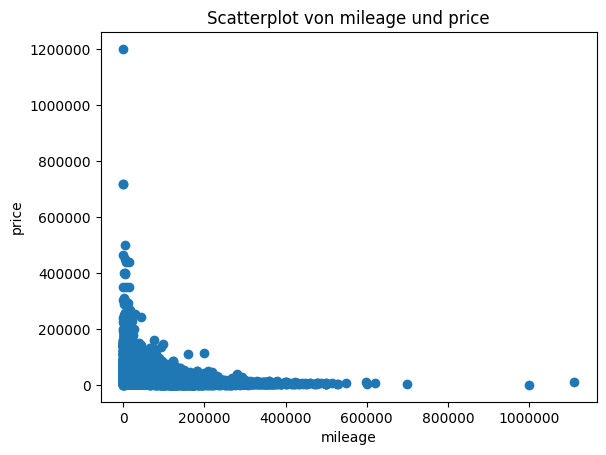

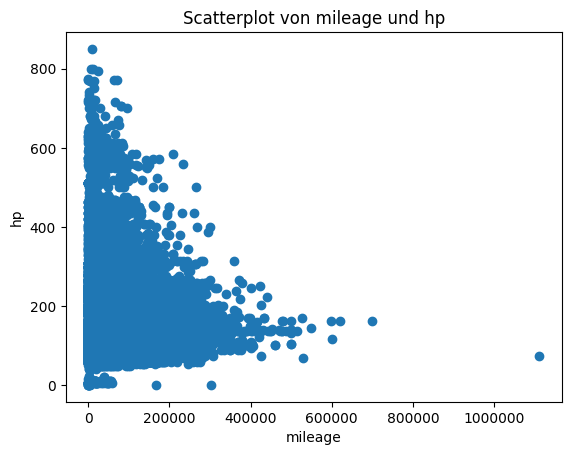

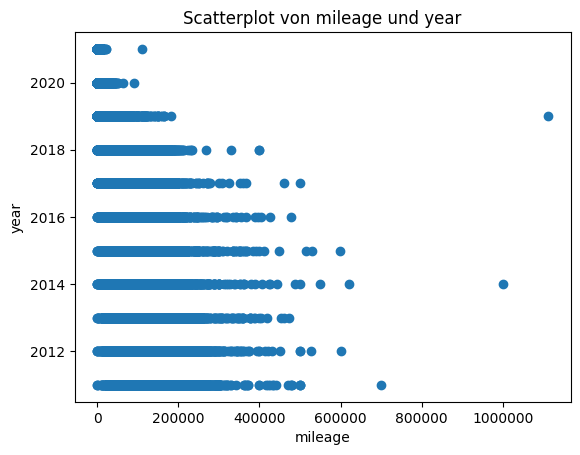

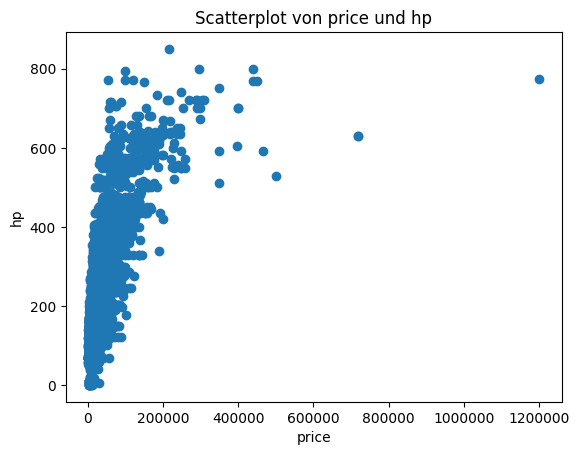

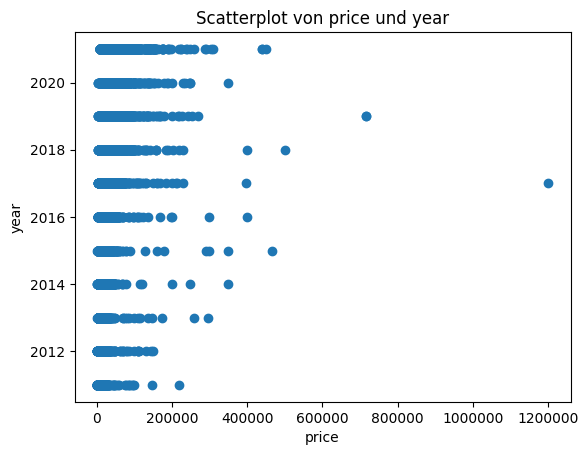

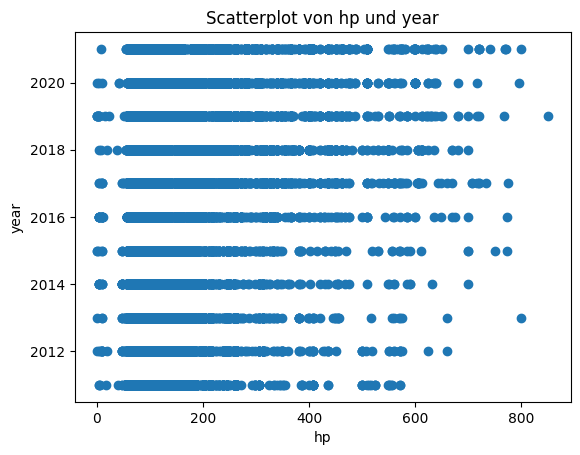

In [4]:
# Korrelatinen zwischen den numerischen Features:

numerical_df = df.drop(["make", "model", "fuel", "gear", "offerType"], axis=1)

# Erstellen von Korrelationsdiagrammen für jede Kombination von Spalten
columns = numerical_df.columns
combinations_of_columns = list(combinations(columns, 2))

for combo in combinations_of_columns:
    plt.scatter(df[combo[0]], df[combo[1]])
    plt.xlabel(combo[0])
    plt.ylabel(combo[1])
    plt.title(f"Scatterplot von {combo[0]} und {combo[1]}")
    plt.ticklabel_format(style='plain', axis='both')  # Deaktiviert wissenschaftliche Notation
    plt.show()

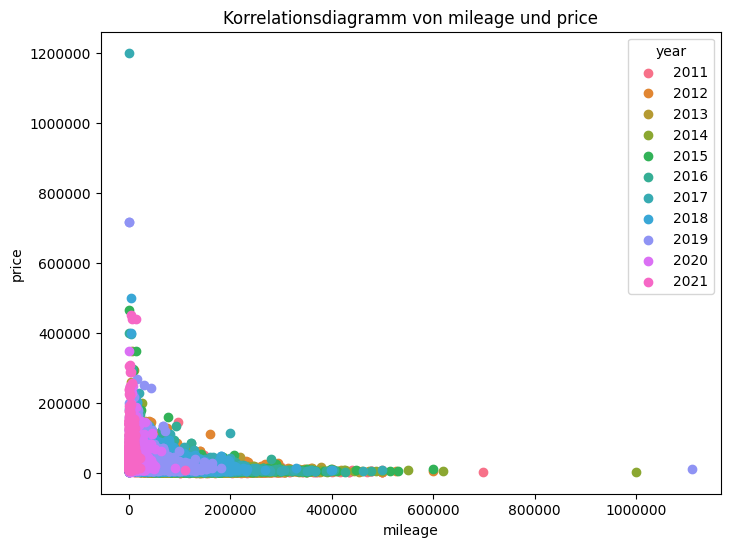

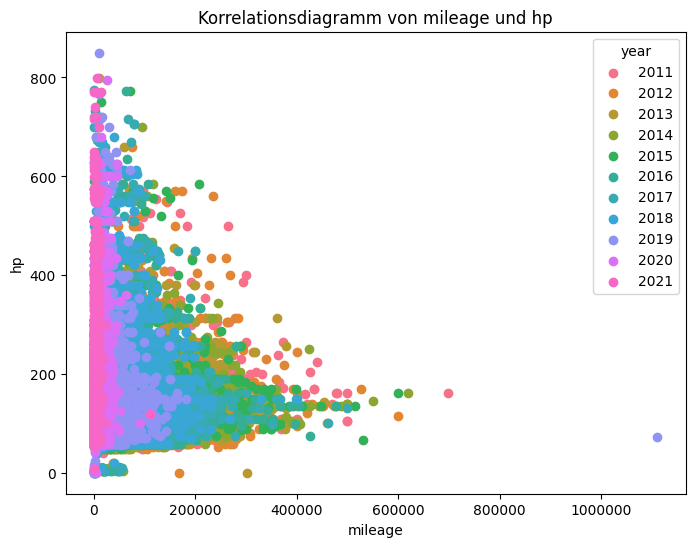

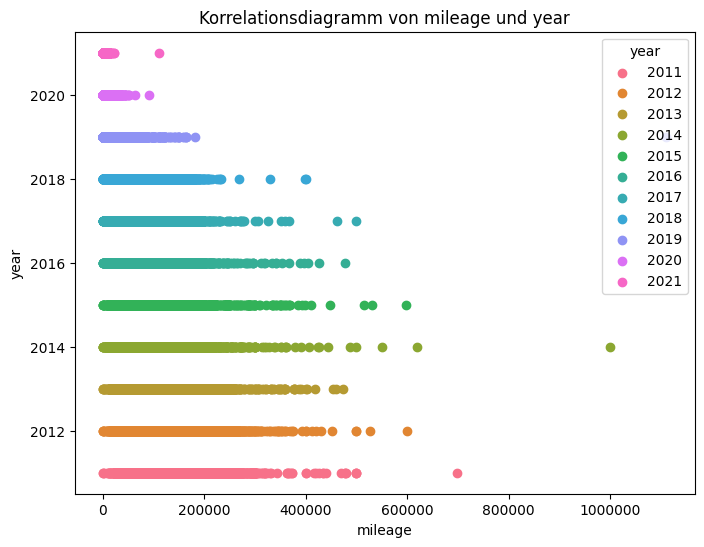

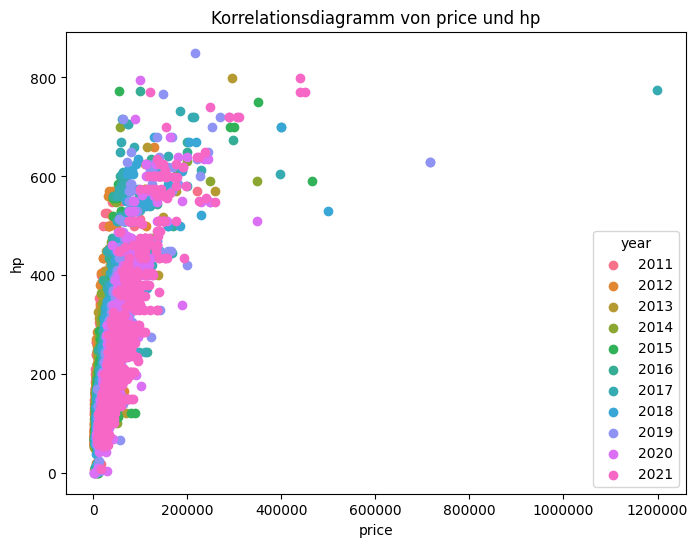

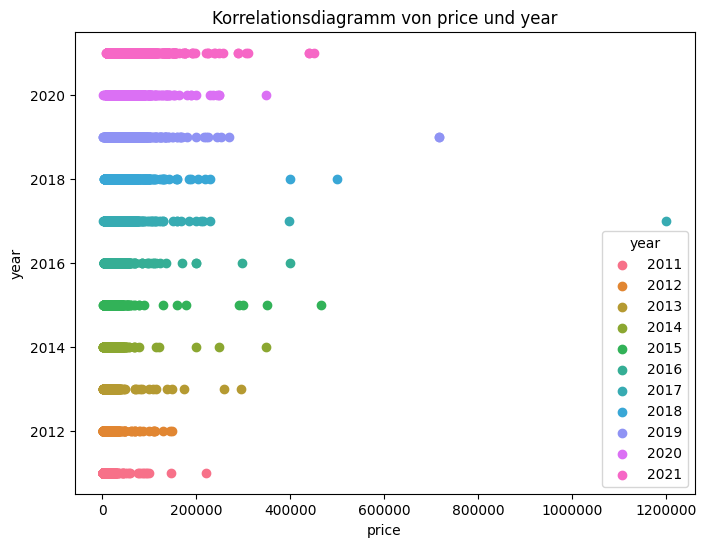

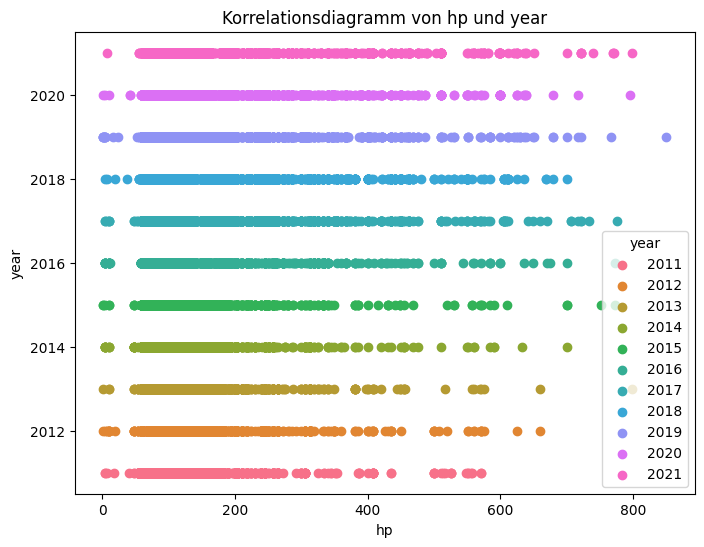

In [5]:
#Korrelation über die einzelnen Jahre

for combo in combinations_of_columns:
    plt.figure(figsize=(8, 6))  # Größe des Plots festlegen
    for year, color in zip(numerical_df['year'].unique(), sns.color_palette('husl', n_colors=len(numerical_df['year'].unique()))):
        df_year = numerical_df[numerical_df['year'] == year]
        plt.scatter(df_year[combo[0]], df_year[combo[1]], label=year, color=color)
    plt.xlabel(combo[0])
    plt.ylabel(combo[1])
    plt.title(f"Korrelationsdiagramm von {combo[0]} und {combo[1]}")
    plt.legend(title='year')
    plt.ticklabel_format(style='plain', axis='both')  # Deaktiviert wissenschaftliche Notation
    plt.show()

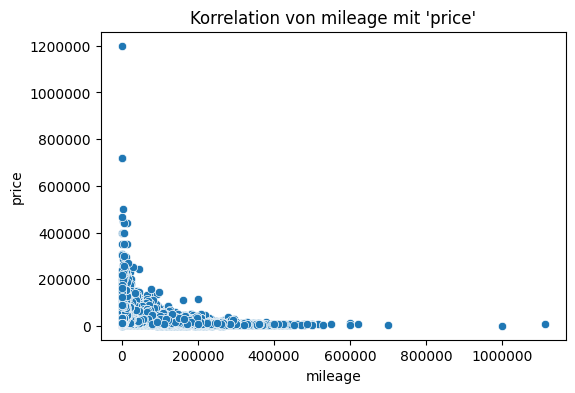

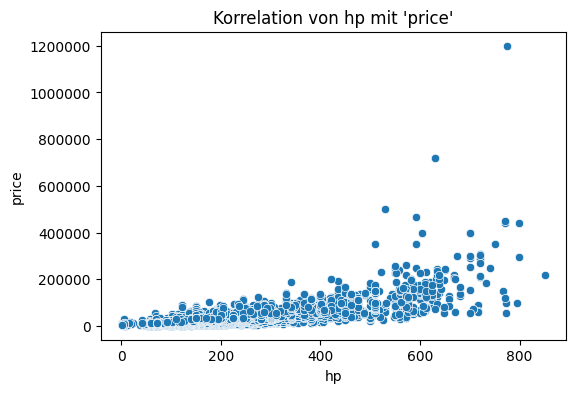

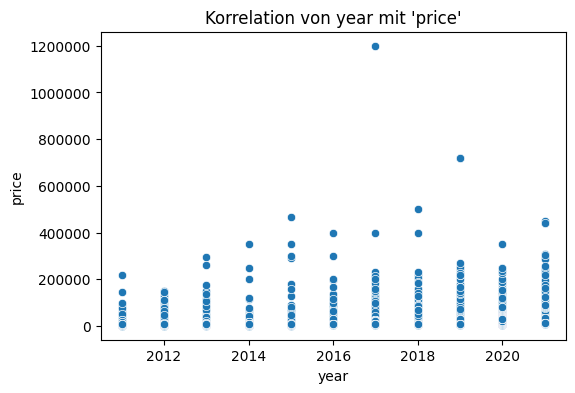

In [6]:
for column in numerical_df.columns[0:1].append(numerical_df.columns[2:]):  # Alle Spalten außer "price"
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=numerical_df, x=column, y='price')
    plt.title(f"Korrelation von {column} mit 'price'")
    plt.xlabel(column)
    plt.ylabel('price')
    plt.ticklabel_format(style='plain', axis='both')  # Deaktiviert wissenschaftliche Notation auf der y-Achse
    plt.show()

In [7]:
# Berechnen der Korrelation zwischen jeder Spalte und der "price"-Spalte
for column in numerical_df.columns[0:1].append(numerical_df.columns[2:]):  # Alle Spalten außer "price"
    correlation = numerical_df[column].corr(numerical_df['price'])
    print(f"Korrelation von {column} mit 'price': {correlation}")

Korrelation von mileage mit 'price': -0.3027877789773674
Korrelation von hp mit 'price': 0.7476172317109249
Korrelation von year mit 'price': 0.40563317787884745


In [5]:
# Preis der 5 am häufigsten verkauften Marken
# Zähle die Häufigkeit der Werte in der Spalte "make"
top_5_makes = df['make'].value_counts().head(5).index.tolist()

# Filtere die Zeilen, die nicht zu den fünf häufigsten Werten gehören
filtered_df = df[df['make'].isin(top_5_makes)]

durchschnittliche_preise = filtered_df.groupby('make')['price'].mean()

print(durchschnittliche_preise)

make
Ford          13791.453399
Opel          10442.955339
Renault       11288.500353
Skoda         13723.617515
Volkswagen    16065.926995
Name: price, dtype: float64


In [6]:
# DF für ML-Algorithmus. Alle Spalten außer Model

ml_df = filtered_df.drop(["model"], axis=1)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

ml_df = ml_df.dropna()
ml_df = pd.get_dummies(ml_df, columns=["make", "gear", "fuel", "offerType"])

# Unabhängige und abhängige Variablen festlegen
X = ml_df.drop('price', axis=1)
y = ml_df['price']

# Train-Test-Split durchführen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lineare Regression initialisieren und anpassen
regression = LinearRegression()
regression.fit(X_train, y_train)

# Vorhersage für den Testdatensatz machen
vorhersagen = regression.predict(X_test)




In [8]:
from sklearn.metrics import mean_absolute_error, r2_score

# Mean Absolute Error berechnen
mae = mean_absolute_error(y_test, vorhersagen)
print("Mean Absolute Error:", mae)

# R-squared (R²) berechnen
r_squared = r2_score(y_test, vorhersagen)
print("R-squared (R²):", r_squared)

Mean Absolute Error: 2674.5285341393414
R-squared (R²): 0.7978495153538178


In [9]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, r2_score

ml_df = filtered_df.drop(["model"], axis=1)
ml_df = ml_df.dropna()
ml_df = pd.get_dummies(ml_df, columns=["make", "gear", "fuel", "offerType"])

# Unabhängige und abhängige Variablen festlegen
X = ml_df.drop('price', axis=1)
y = ml_df['price']

# Train-Test-Split durchführen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# PCA durchführen
pca = PCA(n_components=2)  
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Dimensionen der transformierten Daten überprüfen
print("Anzahl der Hauptkomponenten:", pca.n_components_)

# SVR-Modell initialisieren und anpassen
svr_model_pca = make_pipeline(StandardScaler(), SVR(kernel='rbf'))
svr_model_pca.fit(X_train_pca, y_train)

# Vorhersagen für den Testdatensatz machen
predictions_pca = svr_model_pca.predict(X_test_pca)

# Mean Absolute Error berechnen
mae_pca = mean_absolute_error(y_test, predictions_pca)
print("Mean Absolute Error nach PCA:", mae_pca)

# R-squared (R²) berechnen
r_squared_pca = r2_score(y_test, predictions_pca)
print("R-squared (R²) nach PCA:", r_squared_pca)

Anzahl der Hauptkomponenten: 2
Mean Absolute Error nach PCA: 5141.622542449039
R-squared (R²) nach PCA: 0.11965153459292599


In [12]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

ml_df = filtered_df.drop(["model"], axis=1)
ml_df = ml_df.dropna()
ml_df = pd.get_dummies(ml_df, columns=["make", "gear", "fuel", "offerType"])

# Unabhängige und abhängige Variablen festlegen
X = ml_df.drop('price', axis=1)
y = ml_df['price']

# Daten vorverarbeiten
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Lasso-Modell initialisieren und anpassen
lasso = Lasso(alpha=0.1)  # Wählen Sie den Wert für den Regularisierungsparameter alpha
lasso.fit(X_scaled, y)

# Werte der Koeffizienten anzeigen
coefficients = lasso.coef_
print("Koeffizienten der Features:", coefficients)

# Index der nicht-null Koeffizienten extrahieren
selected_features_index = [i for i, coef in enumerate(coefficients) if coef != 0]
print("Index der ausgewählten Features:", selected_features_index)

# Ausgewählte Features extrahieren
selected_features = X.columns[selected_features_index]
print("Ausgewählte Features:", selected_features)

Koeffizienten der Features: [-2.96598905e+03  4.88801857e+03  2.67307317e+03 -5.54487732e+02
 -9.02224578e+02 -7.00920205e+02 -1.47519785e+02  7.40425670e+02
  8.14482246e+02 -7.28234275e+00  9.77322189e+00 -1.70099750e+00
 -5.94062300e+00  9.97902395e+02  1.28930857e+02  1.45317218e+02
  2.26854249e+02  6.70690025e+00 -7.67203997e+01  9.03492056e+01
 -2.13773419e+01  1.02212945e+03  1.79770383e+02  1.67731223e+02
  3.39743969e+02 -1.04960059e+02]
Index der ausgewählten Features: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
Ausgewählte Features: Index(['mileage', 'hp', 'year', 'make_Ford', 'make_Opel', 'make_Renault',
       'make_Skoda', 'make_Volkswagen', 'gear_Automatic', 'gear_Manual',
       'gear_Semi-automatic', 'fuel_-/- (Fuel)', 'fuel_CNG', 'fuel_Diesel',
       'fuel_Electric', 'fuel_Electric/Diesel', 'fuel_Electric/Gasoline',
       'fuel_Ethanol', 'fuel_Gasoline', 'fuel_LPG', 'fuel_Others',
       'offerType_Demonstration', 

C:\Users\meier\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.734e+08, tolerance: 2.001e+08
  model = cd_fast.enet_coordinate_descent(


In [13]:
from sklearn.linear_model import LinearRegression

# Ausgewählte Features extrahieren
X_selected = X[selected_features]

# Train-Test-Split durchführen
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Modell initialisieren und anpassen
model = LinearRegression()
model.fit(X_train, y_train)

# Vorhersagen für den Testdatensatz machen
predictions = model.predict(X_test)

# Leistung des Modells bewerten
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

r_squared = r2_score(y_test, predictions)
print("R-squared (R²):", r_squared)

Mean Absolute Error: 2674.5285341393414
R-squared (R²): 0.7978495153538178


In [14]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Ausgewählte Features extrahieren
X_selected = X[selected_features]

# Train-Test-Split durchführen
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# XGBoost-Modell initialisieren und anpassen
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Vorhersagen für den Testdatensatz machen
predictions = model.predict(X_test)

# Leistung des Modells bewerten
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

r_squared = r2_score(y_test, predictions)
print("R-squared (R²):", r_squared)


Mean Absolute Error: 1617.9052864225125
Mean Squared Error: 8342078.098022493
R-squared (R²): 0.9070273489396028
